In [1]:
from DepthVisualizer import DepthRenderer, Utils
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
renderer = DepthRenderer(1200, 800, camera_fov=100)
renderer.hide_window()  # If you only want to extract rendered frames, you can disable window with this command

In [3]:
kitti_calib = Utils.read_kitti_calibration("example_calib.txt")
focal_length = kitti_calib["focal_length"]
principal_point = kitti_calib["principal_point"]

In [4]:
help(Utils.read_kitti_point_cloud)

Help on function read_kitti_point_cloud in module DepthVisualizer.DepthVisualizer:

read_kitti_point_cloud(path, calib, color=[255, 255, 255])
    Reads kitti point cloud file and converts its coordinate space from velodyne to camera format
    :param path: Path of the point cloud file
    :param calib: Calibration dictionary, can be read from file using read_kitti_calibration method
    :param color: Color of points
    :return: Returns a list of points where each point is of format [x, y, z, r, g, b]



In [5]:
points = Utils.read_kitti_point_cloud("example_lidar_data.bin", kitti_calib)
renderer.set_points(points)

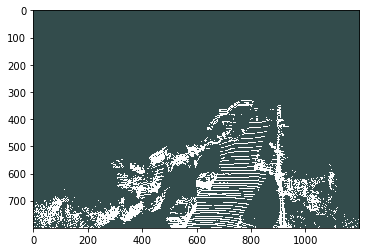

In [6]:
renderer.render()
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [7]:
renderer.set_camera_coords(0, 2, -3)
renderer.change_camera_rotation(0, -10)

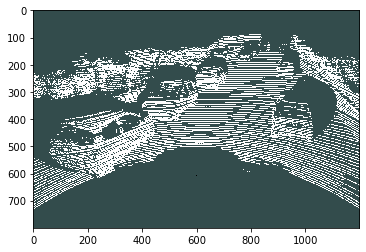

In [8]:
renderer.render()
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [9]:
help(Utils.read_kitti_3d_object)

Help on function read_kitti_3d_object in module DepthVisualizer.DepthVisualizer:

read_kitti_3d_object(path, convert_format=True)
    Reads kitti 3d Object Labels
    :param path: Path of the label.txt file
    :param convert_format: If True, object format will be converted to the DepthVisualizer format which is on
    the following form
    [Type, Truncation, Occlusion, Observing  Angle, 2D Left, 2D Top, 2D Right, 2D Bottom, 3D X, 3D Y, 3D Z,
    3D Width, 3D Height, 3D Length, 3D Rotation]
    :return: A List of objects on either Kitti or DepthVisualizer format, based on convert_format argument



In [10]:
objects = Utils.read_kitti_3d_object("example_label.txt")

for object in objects:
    renderer.add_3d_bbox(object[8:], color=[0, 255, 0])

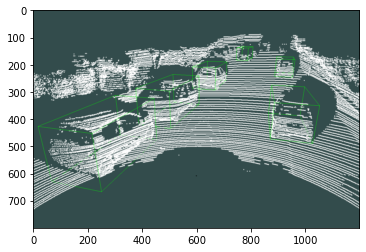

In [11]:
renderer.render()
frame = renderer.get_rendered_frame()
plt.imshow(frame, interpolation="bilinear")

In [12]:
renderer.show_window()
renderer.render_loop() # Render loop will allow you to move around in 3D space using keyboard controls
renderer.hide_window() # Pressing ESC will cancel render loop, allowing code to continue executing

In [13]:
renderer.close()